In [1]:
#import tensorflow as tf
#import tensorflow_hub as hub
#import tensorflow_text
import numpy as np
import pandas as pd
#from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
date = pd.read_csv("date/reviews_mixed.csv",delimiter=",")

date_X = date[date.columns[0]].tolist()

date_Y = date[date.columns[1]].tolist()
date_Y = [1 if el=="positive" else 0 for el in date_Y]

date[:5]

,Text,Sentiment
0,"The rooms are extremely small, practically onl...",negative
1,Room safe did not work.,negative
2,Mattress very comfortable.,positive
3,"Very uncomfortable, thin mattress, with plasti...",negative
4,No bathroom in room,negative


In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(date_X, date_Y)

In [4]:
vectorizer = CountVectorizer()

trainFeatures = vectorizer.fit_transform(np.array(X_train))
testFeatures = vectorizer.transform(np.array(X_test))

In [5]:
print(vectorizer.get_feature_names_out()[:20])
print(trainFeatures.toarray()[0])
print("\nMarime vocabular: ",np.shape(trainFeatures)[1], " cuvinte")
print("Sample-uri: ",np.shape(trainFeatures)[0])

['12am' '15' '15th' '1990' '40' '4th' '650' 'about' 'abundant' 'access'
 'across' 'actually' 'added' 'adjust' 'adults' 'advised' 'after' 'ahead'
 'air' 'aircon']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 

Accuracy:  0.4129032258064516


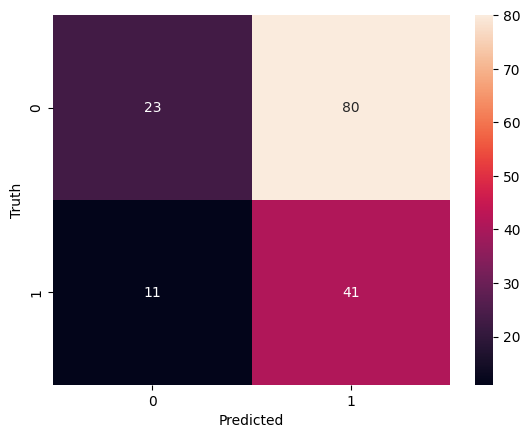

In [6]:
kmeans = KMeans(n_clusters=2).fit(trainFeatures.toarray())

print("Accuracy: ", accuracy_score(Y_train, kmeans.labels_))

cm = confusion_matrix(Y_train, kmeans.labels_)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Accuracy:  0.38461538461538464


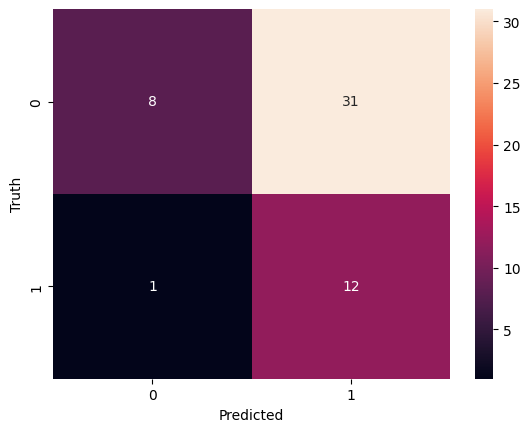

In [7]:
predicted = kmeans.predict(testFeatures)

print("Accuracy: ", accuracy_score(Y_test, predicted))

cm = confusion_matrix(Y_test, predicted)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def remove_stop_words(text):
    text = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word.isalpha() and not word in stop_words]
    return ' '.join(text)

date_X_stopword = list(map(remove_stop_words,date_X))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RoscaMitrut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
vectorizer2 = CountVectorizer()

XFeatures = vectorizer2.fit_transform(np.array(date_X_stopword))

In [10]:
print(vectorizer2.get_feature_names_out()[:20])
print(XFeatures.toarray()[0])
print("\nMarime vocabular: ",np.shape(XFeatures)[1], " cuvinte")
print("Sample-uri: ",np.shape(XFeatures)[0])

['abundant' 'ac' 'access' 'across' 'actually' 'added' 'adjust' 'adults'
 'advertised' 'advised' 'agreed' 'ahead' 'air' 'aircon' 'allow' 'also'
 'although' 'always' 'amazing' 'ambience']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0

Accuracy:  0.6618357487922706


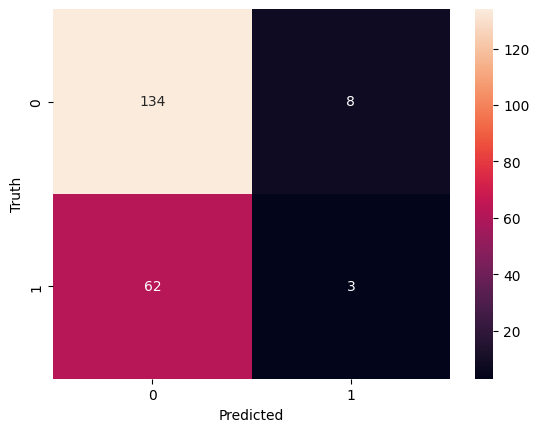

In [11]:
kmeans2 = KMeans(n_clusters=2).fit(XFeatures)

print("Accuracy: ", accuracy_score(date_Y, kmeans2.labels_))

cm = confusion_matrix(date_Y, kmeans2.labels_)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()